In [2]:
import pandas as pd

## Define a function to read the CSV files based on the provided method
def read_custom_format(filepath):
    with open(filepath, 'r') as f:
        lines = f.read().splitlines()

    data = []
    for line in lines[1:]:  # Skip the first line
        fields = line.split(',')
        carId = fields[0]
        rsuId = fields[1]
        messageCount = int(fields[2])
        timestamps = list(map(int, fields[3:]))
        data.append([carId, rsuId, messageCount, timestamps])

    df = pd.DataFrame(data, columns=['CarId', 'RSUId', 'MessageCount', 'Timestamps'])
    return df

# Read the actual_preds and base_preds files
actual_preds_df = read_custom_format('actual_preds.csv')
base_preds_df = read_custom_format('base_preds.csv')

# Displaying the first few rows of both datasets for inspection
actual_preds_df.head(), base_preds_df.head()

(  CarId RSUId  MessageCount                                         Timestamps
 0  car1  bus0             6                               [6, 7, 8, 9, 10, 11]
 1  car1  bus1            27  [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...
 2  car1  bus2             7                       [27, 28, 29, 30, 31, 32, 33]
 3  car1  bus3             5                               [60, 61, 62, 63, 64]
 4  car1  bus4            19  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...,
   CarId RSUId  MessageCount                                         Timestamps
 0  car1  bus0             6                               [6, 7, 8, 9, 10, 11]
 1  car1  bus1            25  [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...
 2  car1  bus2            26  [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 3...
 3  car1  bus3             6                           [57, 58, 59, 60, 61, 62]
 4  car1  bus4            19  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...)

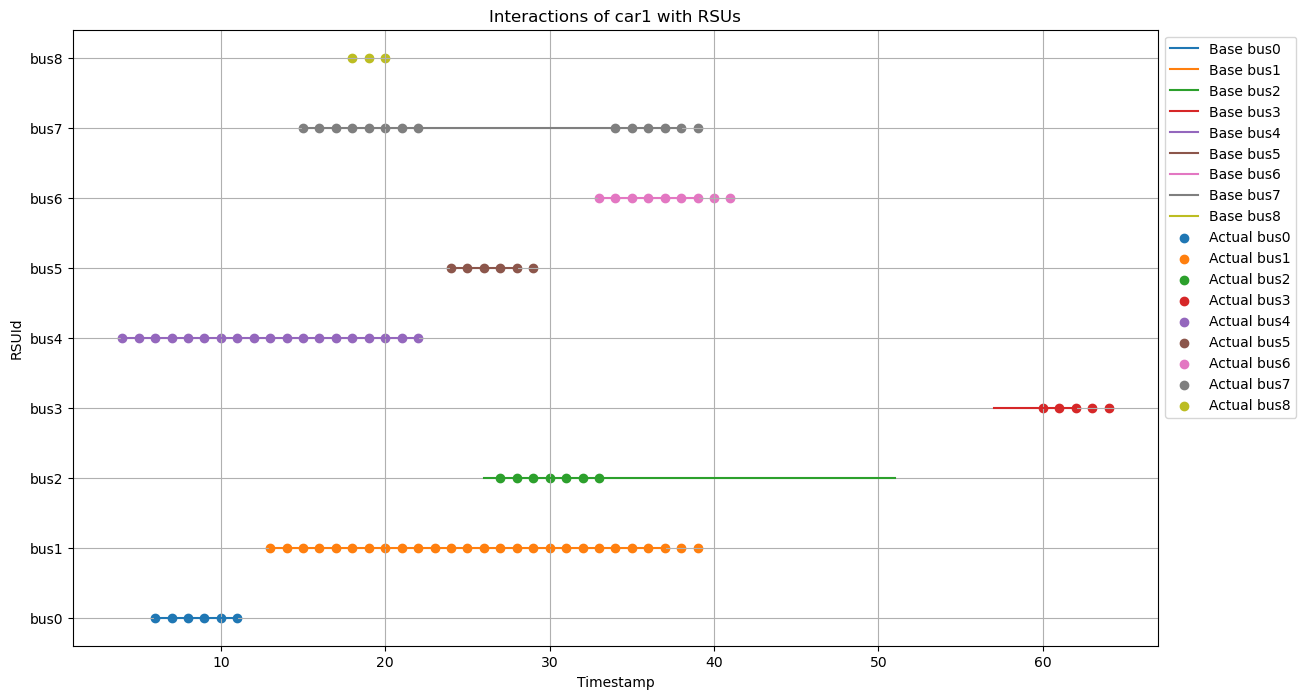

In [3]:
import matplotlib.pyplot as plt

# Filter data for a specific car
car = "car1"
filtered_actual_preds = actual_preds_df[actual_preds_df["CarId"] == car]
filtered_base_preds = base_preds_df[base_preds_df["CarId"] == car]

plt.figure(figsize=(14, 8))

# Plot base predictions
for idx, row in filtered_base_preds.iterrows():
    rsu_id = row["RSUId"]
    timestamps = row["Timestamps"]
    plt.plot(timestamps, [rsu_id] * len(timestamps), '-', label=f"Base {rsu_id}")

# Plot actual predictions as dots
for idx, row in filtered_actual_preds.iterrows():
    rsu_id = row["RSUId"]
    timestamps = row["Timestamps"]
    plt.scatter(timestamps, [rsu_id] * len(timestamps), label=f"Actual {rsu_id}")

plt.title(f"Interactions of {car} with RSUs")
plt.xlabel("Timestamp")
plt.ylabel("RSUId")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjusting the legend's position
plt.grid(True)
plt.show()

In [4]:
# Initialize the error counters
missed_interactions = {}
extra_interactions = {}

# Calculate errors for each RSU
rsu_ids = set(filtered_base_preds["RSUId"]).union(set(filtered_actual_preds["RSUId"]))
for rsu_id in rsu_ids:
    base_timestamps = set(filtered_base_preds[filtered_base_preds["RSUId"] == rsu_id]["Timestamps"].sum())
    actual_timestamps = set(filtered_actual_preds[filtered_actual_preds["RSUId"] == rsu_id]["Timestamps"].sum())
    
    missed_interactions[rsu_id] = len(actual_timestamps - base_timestamps)
    extra_interactions[rsu_id] = len(base_timestamps - actual_timestamps)

missed_interactions, extra_interactions

({'bus5': 1,
  'bus6': 2,
  'bus2': 0,
  'bus7': 2,
  'bus3': 2,
  'bus4': 0,
  'bus0': 0,
  'bus1': 2,
  'bus8': 2},
 {'bus5': 0,
  'bus6': 0,
  'bus2': 19,
  'bus7': 0,
  'bus3': 3,
  'bus4': 0,
  'bus0': 0,
  'bus1': 0,
  'bus8': 0})

In [5]:
# Calculate duration of interactions for both actual and base predictions
def calculate_duration(df):
    durations = {}
    for idx, row in df.iterrows():
        rsu_id = row["RSUId"]
        timestamps = row["Timestamps"]
        duration = max(timestamps) - min(timestamps) + 1  # +1 to include both start and end timestamp
        durations[rsu_id] = durations.get(rsu_id, 0) + duration
    return durations

actual_durations = calculate_duration(filtered_actual_preds)
base_durations = calculate_duration(filtered_base_preds)

actual_durations, base_durations

({'bus0': 6,
  'bus1': 27,
  'bus2': 7,
  'bus3': 5,
  'bus4': 19,
  'bus5': 6,
  'bus6': 9,
  'bus7': 25,
  'bus8': 3},
 {'bus0': 6,
  'bus1': 25,
  'bus2': 26,
  'bus3': 6,
  'bus4': 19,
  'bus5': 5,
  'bus6': 7,
  'bus7': 24,
  'bus8': 1})

In [11]:
# Calculate frequency of interactions for both actual and base predictions
def calculate_frequency(df):
    frequencies = {}
    for idx, row in df.iterrows():
        rsu_id = row["RSUId"]
        timestamps = row["Timestamps"]
        frequencies[rsu_id] = frequencies.get(rsu_id, 0) + len(timestamps)
    return frequencies

actual_frequencies = calculate_frequency(filtered_actual_preds)
base_frequencies = calculate_frequency(filtered_base_preds)

actual_frequencies, base_frequencies

({'bus0': 6,
  'bus1': 26,
  'bus2': 25,
  'bus3': 5,
  'bus4': 19,
  'bus5': 5,
  'bus6': 7,
  'bus7': 12,
  'bus8': 2},
 {'bus0': 6,
  'bus1': 25,
  'bus2': 26,
  'bus3': 6,
  'bus4': 19,
  'bus5': 5,
  'bus6': 7,
  'bus7': 12,
  'bus8': 1})